# E-Commerce Customer Segmentation using RFM and K-Means
This project part of learning data analys exploration and chrun prediction

This synthetic dataset represents E-commerce sales transactions containing 34,500 records across 17 features. It has been carefully designed to simulate realistic online shopping data and can be used for multiple data science and (unsupervise) machine learning tasks, including:

🔹 Sales Analysis – revenue trends, profit margins, regional performance, category-wise sales

🔹 Customer Segmentation – cutrome behavior, segmentation customer by transaction







We will start with loading the dataset formating csv

In [1]:
#import liblary necessary for this project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#load Data ecommerce 
LoadData = "ecommerce_sales_34500.csv"

Data = pd.read_csv(LoadData)
#Checking the dataset  
print("Number of Row & Columns:",Data.shape,"\n")
print("Type of DataFrame:", Data.info())
print("Na Total in dataset:", Data.isna().sum())

Number of Row & Columns: (34500, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age  

Upon reviewing the dataset, we have confirmed that it consists of 34,500 rows and 17 columns. The dataset has been thoroughly cleaned and is now prepared for analysis. The next step involves converting the data type of the `"order_date"` column to `"datetime"` to ensure proper functionality.

In [2]:
#converd the datatype order_data as datetime
Data["order_date"] = pd.to_datetime(Data["order_date"], yearfirst=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            34500 non-null  object        
 1   customer_id         34500 non-null  object        
 2   product_id          34500 non-null  object        
 3   category            34500 non-null  object        
 4   price               34500 non-null  float64       
 5   discount            34500 non-null  float64       
 6   quantity            34500 non-null  int64         
 7   payment_method      34500 non-null  object        
 8   order_date          34500 non-null  datetime64[ns]
 9   delivery_time_days  34500 non-null  int64         
 10  region              34500 non-null  object        
 11  returned            34500 non-null  object        
 12  total_amount        34500 non-null  float64       
 13  shipping_cost       34500 non-null  float64   

---
# Exploratory Data Analysis (EDA)

After checking the dataset and ensuring that all data types are correct, we can begin exploring the dataset. This exploration is important for uncovering key insights that can drive business strategies.  

Our exploration will focus on the following areas:

- **Best-Selling `Category` by `Region`**  
  We will identify the top-performing categories in each region by comparing revenue, sales quantity, and profit generated by each category.  

- **Best Sales Moment by `Order Date`**  
  We will analyze the best time periods for sales performance based on revenue and total quantity sold. This will help us determine the right momentum to maximize sales performance by looking at sales patterns across dates and weekdays.  

- **Customer Behavior Patterns**  
  To understand customer shopping behavior, we will apply the RFM (Recency, Frequency, Monetary) model. Customers will be segmented using **K-Means clustering** to identify behavioral patterns and groups.  

Through this process, we aim to uncover actionable insights that will support data-driven decision-making for the business.  


In [3]:
Data

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,-0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,East,No,1618.20,12.18,182.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female


# Category & Region



## Category Analysis by Revenue, Quantity, and Profit per Region  

To evaluate the performance of each category across regions, we will begin by analyzing the **total amount** in order to understand the overall data distribution. This step is crucial to avoid misleading conclusions when interpreting revenue. For instance, a category with the highest sales revenue does not necessarily reflect the highest sales volume; instead, it might simply result from a higher average price of items in that category.  

Therefore, to ensure a more accurate interpretation, our process will include the following steps:  

- **Check the distribution of `total_amount` using a boxplot**  
  This will help us identify the presence and impact of outliers, which may skew the results and lead to biased insights if not properly considered.  

- **Examine the average price per category**  
  By analyzing price levels, we can better distinguish whether high revenues are driven by sales quantity or by higher product prices. This distinction is critical for understanding the real drivers of performance.  

- **Analyze the average profit margin per category**  
  Understanding profitability is just as important as revenue and sales volume. Some categories may generate significant sales but offer lower margins, while others might deliver fewer sales yet contribute more to overall profit.  

Through these steps, we aim to create a balanced view that considers not only sales revenue but also quantity and profitability. This multi-dimensional approach ensures that business decisions are based on a deeper understanding of category performance across regions.  


Describetion of Total Amount:
 count    34500.000000
mean       170.008494
std        357.503014
min          0.820000
25%         19.710000
50%         56.820000
75%        168.530000
max      12931.800000
Name: total_amount, dtype: float64

Describetion of Profit Msrgin:
 count    34500.000000
mean        28.116505
std         53.352947
min         -6.200000
25%          1.500000
50%         10.550000
75%         33.132500
max       1536.170000
Name: profit_margin, dtype: float64


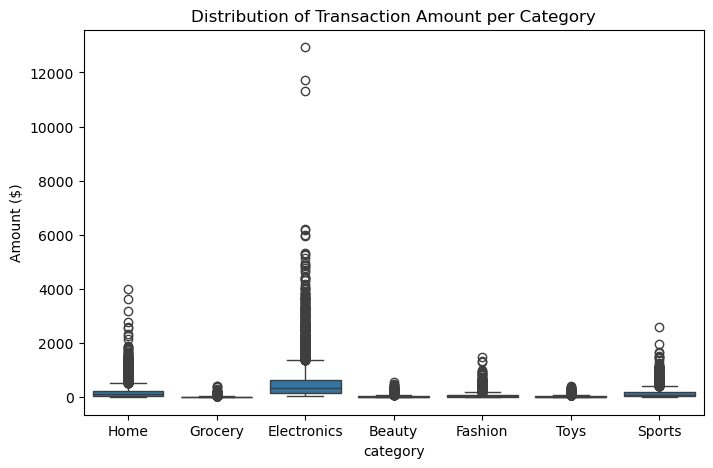

In [4]:
print("Describetion of Total Amount:\n",Data["total_amount"].describe())
print("\nDescribetion of Profit Msrgin:\n",Data["profit_margin"].describe())

plt.figure(figsize=(8,5))
sns.boxplot(data=Data, x="category", y="total_amount")
plt.title("Distribution of Transaction Amount per Category")
plt.ylabel("Amount ($)")
plt.show()

In [5]:
Priceing = Data.groupby("category")["price"].mean().reset_index()
avg_price = Priceing.rename(columns={"price":"Avg_price"})

avg_price.style.format({"Avg_price":"${:,.2f}"})

,category,Avg_price
0,Beauty,$26.47
1,Electronics,$374.42
2,Fashion,$54.59
3,Grocery,$14.26
4,Home,$137.48
5,Sports,$107.57
6,Toys,$22.17


In [6]:
Avg_profit = Data.groupby("category")["profit_margin"].mean()

Avg_profit

category
Beauty         11.990395
Electronics    55.723587
Fashion        20.597162
Grocery        -2.264160
Home           47.864717
Sports         38.485114
Toys            7.927773
Name: profit_margin, dtype: float64

After checking the average prices of each category, we can see that electronics have a higher price compared to others, while toys have the lowest price. If we aggregate the `"total_amount`", it will create an imbalance. This imbalance is not due to the actual contribution of each category, but rather because electronics are more expensive and generate significantly higher revenue than the others.

that's why we will evaluate the category for each region by analyzing key metrics such as revenue, profit, and quantity. This detailed examination will allow us to compare the differences across these categories and gain valuable insights from various perspectives. By understanding these metrics, we can better assess the performance and trends within each region.

Here’s how the pivot table will be set up:  
- **Columns:** `"Region"`  
- **Index:** `"Category"`  
- **Values:** `"Total_Amount"`/`"Profit"`/`"Quantity"`  
- **Aggregation Function:** `.sum()`  

To make the results easier to interpret, we will also visualize the pivot table using a **heatmap**.


<function matplotlib.pyplot.show(close=None, block=None)>

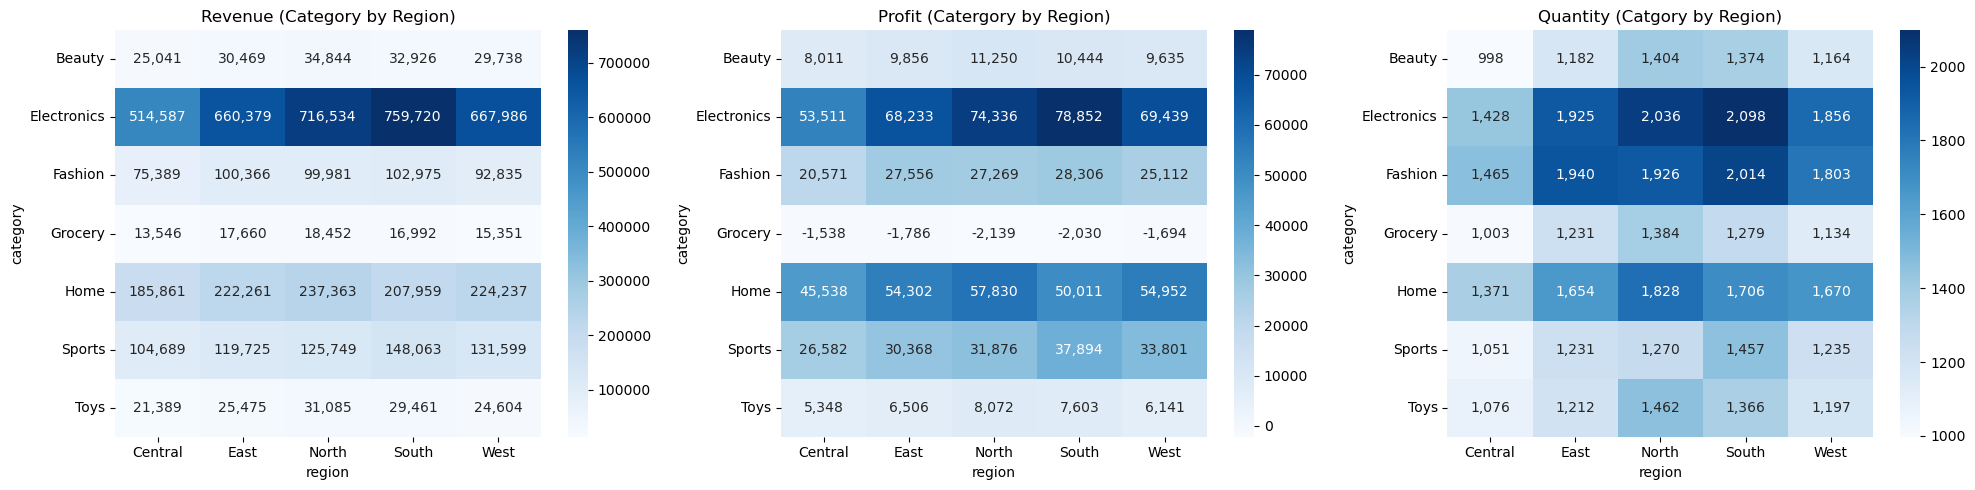

In [7]:
#Creat Pivot Table for Revenue
RevenueCat = Data.pivot_table(
    columns= "region",
    index="category",
    values="total_amount",
    aggfunc= "sum"
)
#Creat Pivot Table for Profit
ProfitCat = Data.pivot_table(
    columns= "region",
    index="category",
    values="profit_margin",
    aggfunc= "sum"
) 
#Creat Pivot Table for Quatity
QuantityCat = Data.pivot_table(
    columns= "region",
    index="category",
    values="quantity",
    aggfunc= "sum"
)

#Visualization the pivot table with heatmap
fig, axes = plt.subplots(1,3, figsize=(20, 5))

sns.heatmap(RevenueCat, ax=axes[0], annot=True, fmt=",.0f", cmap="Blues")
axes[0].set_title("Revenue (Category by Region)")

sns.heatmap(ProfitCat, ax=axes[1], annot=True, fmt=",.0f", cmap="Blues")
axes[1].set_title("Profit (Catergory by Region)")

sns.heatmap(QuantityCat, ax=axes[2], annot=True, fmt=",.0f", cmap="Blues")
axes[2].set_title("Quantity (Catgory by Region)")

plt.tight_layout()
plt.show


### Sales Analysis by Category and Region

The visualization above shows **Revenue, Profit, and Quantity** across product categories and regions.  

- **Revenue**  
   - **Electronics** dominates revenue in all regions, especially in the **South** and **North**.  
   - Categories like **Grocery** and **Toys** contribute the least to overall revenue.  

- **Profit**  
   - Profit patterns follow revenue: **Electronics** remains the top contributor in all regions.  
   - **Home** generates solid profit despite lower revenue compared to Electronics.  
   - **Grocery** shows negative profit in every region, indicating consistent losses.  

- **Quantity**  
   - **Electronics** also leads in sales volume across all regions.  
   - However, the gap in quantity between categories is narrower than revenue. For example, **Fashion** and **Home** also record relatively high volumes.  

### Business Insights
- **Electronics** → High revenue, high profit, and high quantity → strong demand and high-value products.  
- **Home** → Strong profitability despite moderate revenue and quantity → attractive margin potential.  
- **Grocery** → Low revenue and negative profit → pricing, distribution, or promotion strategies may need review.  
- **Fashion** → Moderate revenue and profit with stable quantity → a category with room for targeted growth.  


---
# Sales by Order Date

Now we will analyze **Revenue** and **Quantity** by order date to understand customer spending behavior over time.  
This will help us identify the most prospective periods when customers tend to spend more on our e-commerce platform.

Key points:
- Creat **feture** Month & Days
- Track **Revenue trends** over time.  
- Track **Quantity trends** over time.  
- Identify peak periods of customer spending.  
- Use insights for **marketing campaigns** and **inventory planning**.  


In [8]:
# Create a data copy to prevent potential problems
sales_data = Data.copy()

# Creat feture for Exploreing Data 
sales_data["order by Month"] = sales_data["order_date"].dt.month
sales_data["order by Days"] = sales_data["order_date"].dt.day_name()

sales_data

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order by Month,order by Days
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female,12,Saturday
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male,4,Thursday
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male,10,Tuesday
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female,9,Saturday
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male,12,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,-0.12,23,Female,8,Wednesday
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,South,Yes,21.56,3.37,6.33,61,Female,12,Monday
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,East,No,1618.20,12.18,182.00,41,Female,2,Saturday
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female,3,Wednesday


Text(0, 0.5, 'Quantity')

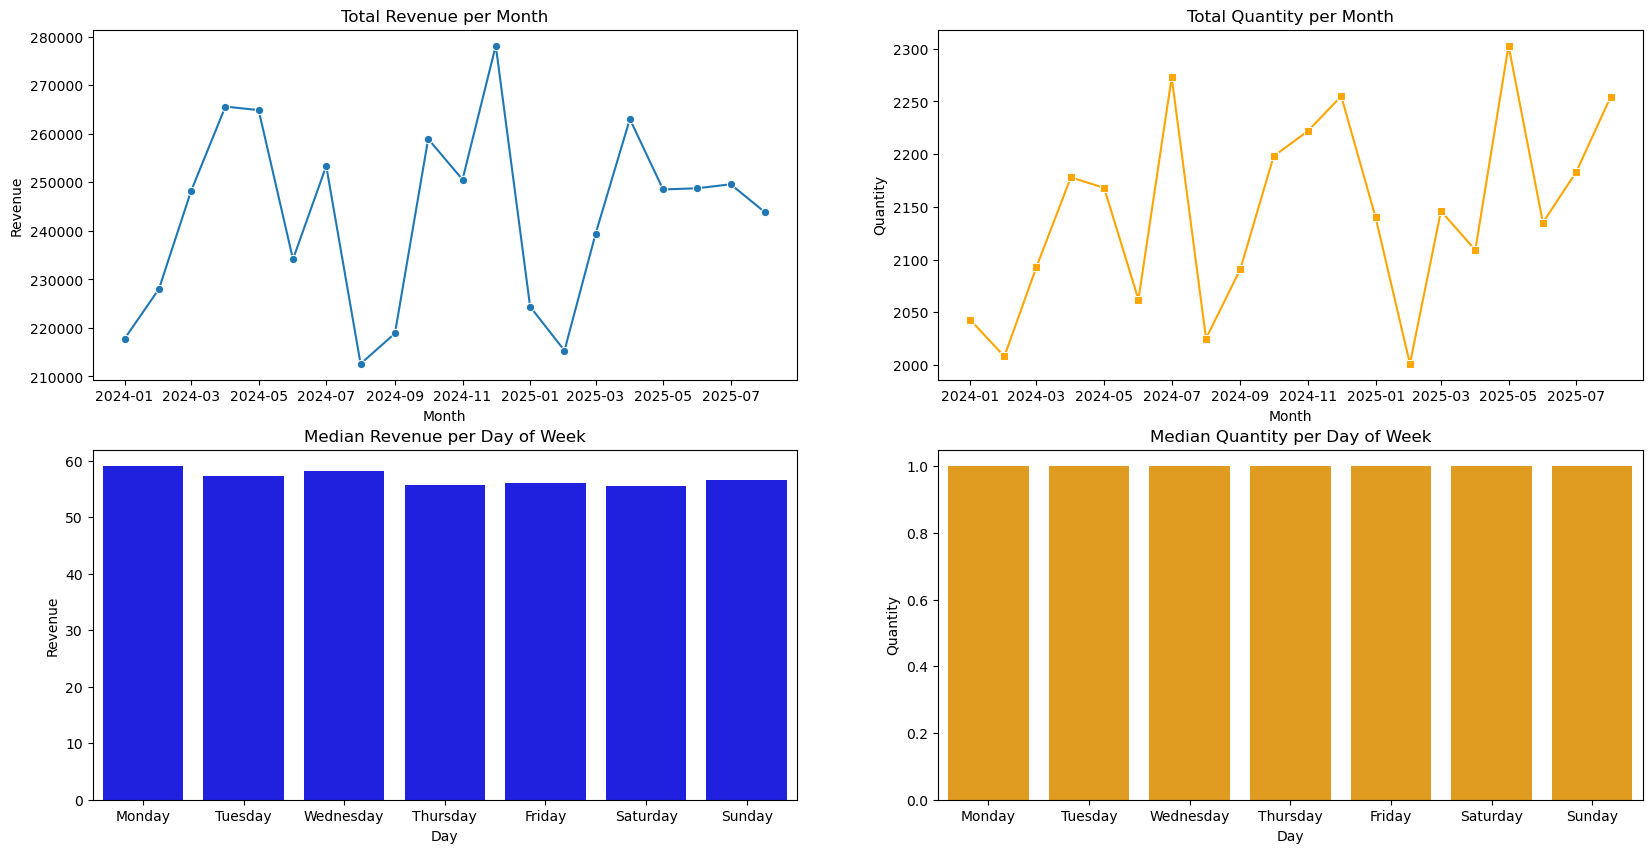

In [9]:
# Monthly Aggregation with sum
monthly = sales_data[sales_data["order_date"].dt.year.isin([2024,2025])]
monthly = monthly.groupby(sales_data["order_date"].dt.to_period("M")).agg({
    "total_amount": "sum",
    "quantity": "sum"
}).reset_index()
monthly["order_date"] = monthly["order_date"].dt.to_timestamp()
monthly = monthly[
    ~((monthly["order_date"].dt.year == 2025) & (monthly["order_date"].dt.month == 9))
]
# Daily Aggregation (MEDIAN per day of week)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_order = sales_data.groupby(sales_data["order by Days"]).agg({
    "total_amount" : "median",
    "quantity" : "median"
}).reindex(day_order).reset_index()

# Ploting chart 2x2
fig, axes = plt.subplots(2,2,figsize=(20,10))

sns.lineplot(data=monthly, x="order_date", y="total_amount", marker="o", ax=axes[0,0])
axes[0,0].set_title("Total Revenue per Month")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Revenue")

# Box 2: Quantity per Month
sns.lineplot(data=monthly, x="order_date", y="quantity", marker="s", ax=axes[0,1], color="orange")
axes[0,1].set_title("Total Quantity per Month")
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Quantity")

# Box 3: Median Revenue per Day of Week
sns.barplot(data=daily_order, x="order by Days", y="total_amount", ax=axes[1,0], color="Blue")
axes[1,0].set_title("Median Revenue per Day of Week")
axes[1,0].set_xlabel("Day")
axes[1,0].set_ylabel("Revenue")

# Box 4: Median Quantity per Day of Week
sns.barplot(data=daily_order, x="order by Days", y="quantity", ax=axes[1,1], color="Orange")
axes[1,1].set_title("Median Quantity per Day of Week")
axes[1,1].set_xlabel("Day")
axes[1,1].set_ylabel("Quantity")

This report provides an overview of sales performance based on revenue and quantity. The analysis is broken down by **month** and **day of the week**.

**Total Revenue per Month**
The line chart (top-left) shows the **total revenue** trend for each month in 2024 & 2025.  
- Revenue fluctuated throughout the year, with noticeable peaks in **May** and **December**.  
- The lowest revenue was recorded around **July**, before rising again towards the end of the year.  

This suggests that sales performance may be influenced by **seasonal demand or promotional periods**.

**Total Quantity per Month**
The line chart (top-right) illustrates the **total sales quantity** per month.  
- Similar to revenue, quantity sold also fluctuates, with the highest spike in **July**.  
- Interestingly, the revenue did not peak in July, suggesting that **higher quantity sold does not always equal higher revenue** (possibly due to discounts or lower-priced items being sold).  

**Median Revenue per Day of Week**
The bar chart (bottom-left) presents the **median revenue** for each day of the week.  
- Revenue appears fairly consistent across all days, with **Monday** showing a slightly higher median compared to other days.  
- This could indicate that sales campaigns or customer purchasing behavior are stronger at the beginning of the week.  

**Median Quantity per Day of Week**
The bar chart (bottom-right) shows the **median quantity sold** per day of the week.  
- The quantity is almost identical across all days, showing **no significant variation**.  
- This suggests that customer purchase volume is stable regardless of the day of the week.  

**Key Insights**
1. **Seasonality matters**: Both revenue and quantity show clear monthly fluctuations.  
2. **Quantity vs Revenue mismatch**: July had the highest sales quantity but not the highest revenue.  
3. **Stable weekly behavior**: Sales per day of the week remain consistent, with Monday being slightly stronger in revenue.  


## Customer Behavior Analysis  

To analyze customer behavior, we will apply the **RFM model (Recency, Frequency, Monetary Value)**. This approach allows us to segment customers based on their purchasing activity and overall value to the business.  

- **Recency**: Measures how recently a customer made a purchase.  
  - Interpretation: A higher value indicates that the customer has not shopped for a longer period, suggesting reduced engagement.  

- **Frequency**: Measures how often a customer makes purchases.  
  - Interpretation: A higher value means the customer shops more frequently, indicating stronger loyalty.  

- **Monetary Value**: Measures the total spending of a customer.  
  - Interpretation: A higher value reflects higher spending, meaning the customer contributes more revenue.  

To perform segmentation, we will use **unsupervised modeling with K-Means clustering**. This method helps group customers fairly and efficiently based on their RFM scores. To determine the most suitable number of clusters (`K`), we will test and validate using the **Elbow Method** and **Silhouette Score**.  

By applying this approach, we can uncover distinct customer segments, enabling more targeted strategies in marketing, retention, and sales optimization.  


In [10]:
reff_date = sales_data["order_date"].max() + pd.Timedelta(days=1)

rmf = sales_data.groupby("customer_id").agg({
    "order_date" : lambda x: (reff_date - x.max()).days,
    "order_id" : "count",
    "total_amount" : "sum"
})

rmf.rename(columns={"order_date": "Recency", "order_id": "Frequency", "total_amount": "Value"}, inplace=True)

rmf.head()

,Recency,Frequency,Value
customer_id,,,
C10000,5,2,210.58
C10001,194,5,3246.02
C10002,401,5,216.85
C10003,72,3,154.30
C10004,600,3,716.99


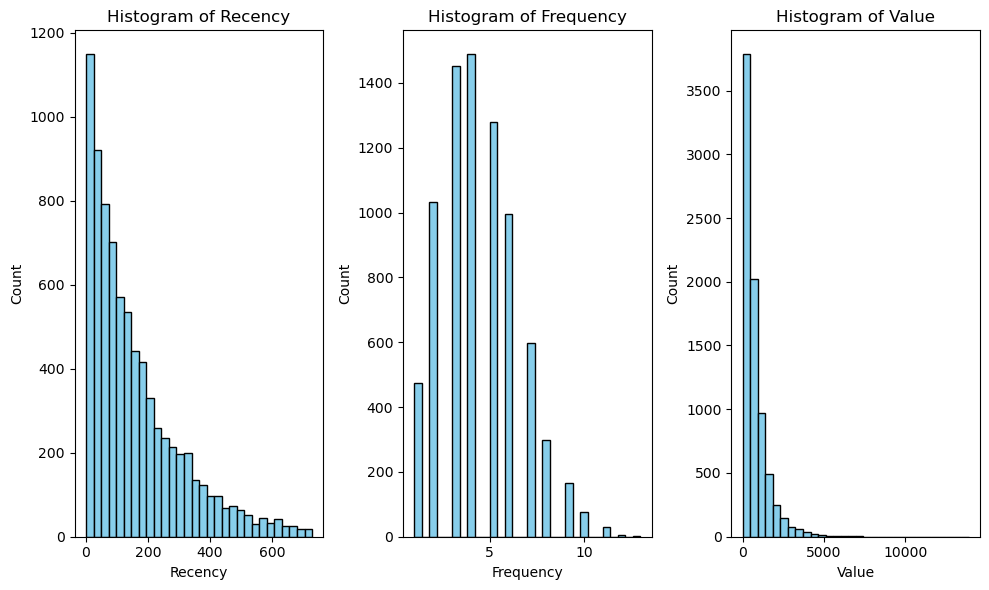

In [11]:
columns = ["Recency", "Frequency", "Value"]

plt.figure(figsize=(10,6))

for i , col in enumerate(columns,1):
    plt.subplot(1, 3, i)
    plt.hist(rmf[col], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()

plt.show()

### Insights from Histograms (RFM Analysis)

- **Recency**
  - Most customers made their purchase recently (low recency values).  
  - Only a small portion of customers have not purchased for a long time, indicating potential churn risk.  
  - This suggests that the customer base is still relatively active.  

- **Frequency**
  - The majority of customers purchase around **3–5 times**.  
  - Only a small group of customers show very high purchase frequency (>10 times).  
  - This indicates that while most customers buy occasionally, there is a small but important group of loyal buyers.  

- **Value (Monetary)**
  - Most customers generate **low total purchase value**.  
  - A few customers contribute significantly higher spending, acting as **high-value customers**.  
  - This highlights the importance of customer segmentation and targeted strategies for top spenders.  

### Business Implications
- The business has an active customer base, but most are **low-frequency and low-value buyers**.  
- There is an opportunity to **increase purchase frequency** among the majority through targeted campaigns or loyalty programs.  
- The **high-value customers** should be prioritized with retention strategies, as they contribute disproportionately to revenue.  


---
### Log1p Transformation  

From the histogram visualization, we observed that the data is skewed (some values are concentrated to the left or right), indicating the presence of outliers. Such skewness can negatively impact clustering performance when using **K-Means**, as the algorithm is sensitive to differences in scale.  

To address this, we apply the **log1p transformation**. This method helps reduce skewness and spreads the data more evenly, allowing for fairer segmentation during clustering.  

### How `log1p` Works  
The function `log1p(x)` computes the natural logarithm of *(1 + x)*.  
- This is particularly useful when data contains zeros or very small values, since applying a standard logarithm (`log(x)`) would be undefined for zero.  
- By compressing large values while keeping small values less affected, `log1p` reduces the impact of extreme outliers and makes the data distribution more balanced.  


In [12]:
# creat copy 
rmf_log = rmf.copy()

# Transform use log
for col in ["Recency", "Frequency", "Value"]:
    rmf_log[col] = np.log1p(rmf_log[col])

# StandardScaler
scaler = StandardScaler()
rmf_scaled = scaler.fit_transform(rmf_log)

rmf_log.head()



,Recency,Frequency,Value
customer_id,,,
C10000,1.791759,1.098612,5.354603
C10001,5.273000,1.791759,8.085493
C10002,5.996452,1.791759,5.383807
C10003,4.290459,1.386294,5.045359
C10004,6.398595,1.386294,6.576456


## Determining the Optimal Number of Clusters  

After applying the transformation to the RFM data, the distribution becomes more balanced, and the distances between data points are not as extreme. This ensures that clustering can be performed more fairly.  

The next step is to determine the most suitable number of clusters (`K`). To achieve this, we will evaluate clustering performance using two methods:  

- **Elbow Method**: Helps identify the point at which adding more clusters does not significantly improve the model (diminishing returns).  
- **Silhouette Score**: Measures how well each data point fits within its assigned cluster compared to other clusters. Higher scores indicate better-defined clusters.  

We will run a **for loop** to test cluster values within the range


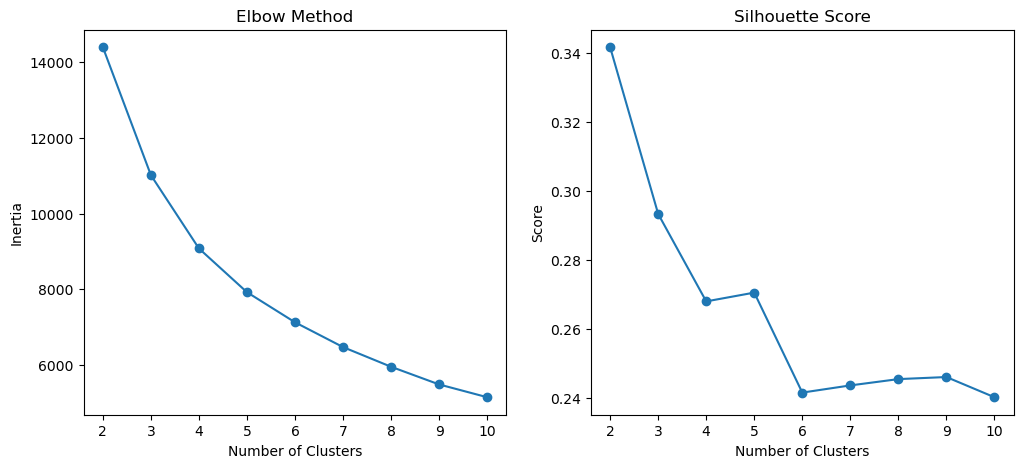

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rmf_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(rmf_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

# Elbow plot
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.show()


## Selecting the Optimal K  

Based on the results from the **Elbow Method** and **Silhouette Score**, we determined that the most appropriate number of clusters is **K = 3**.  

- From the **Elbow Method**, the curve starts to flatten after 3 clusters, indicating diminishing returns in reducing inertia beyond this point.  
- From the **Silhouette Score**, the highest score occurs at 2 clusters, but this would oversimplify the segmentation and fail to capture meaningful differences among customers. At **K = 3**, the score remains relatively high while providing a more balanced segmentation.  

Therefore, **K = 3** was selected as the optimal choice. This setting provides a good trade-off between cluster compactness and business interpretability, allowing us to segment customers into three distinct and actionable groups.  


In [14]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_final.fit(rmf_scaled)

rmf_log["Cluster"] = kmeans_final.labels_

rmf_log.groupby("Cluster").mean()


,Recency,Frequency,Value
Cluster,,,
0,2.988038,1.856520,6.546877
1,5.253287,1.149954,4.794097
2,4.979813,1.752475,6.591138


In [15]:
# Buat mapping cluster ke segment
segment_map = {
    0: "Active Spenders",   # Recency Low, freq & value Mid
    1: "Lost Customers",    # Recency High, freq & value Low
    2: "Big Spenders"       # Recency High, value High
}

# input secmentation dataframe
rmf_log["Segment"] = rmf_log["Cluster"].map(segment_map)

# Checking data
rmf_log.groupby("Segment")[["Recency","Frequency","Value"]].mean()


,Recency,Frequency,Value
Segment,,,
Active Spenders,2.988038,1.856520,6.546877
Big Spenders,4.979813,1.752475,6.591138
Lost Customers,5.253287,1.149954,4.794097


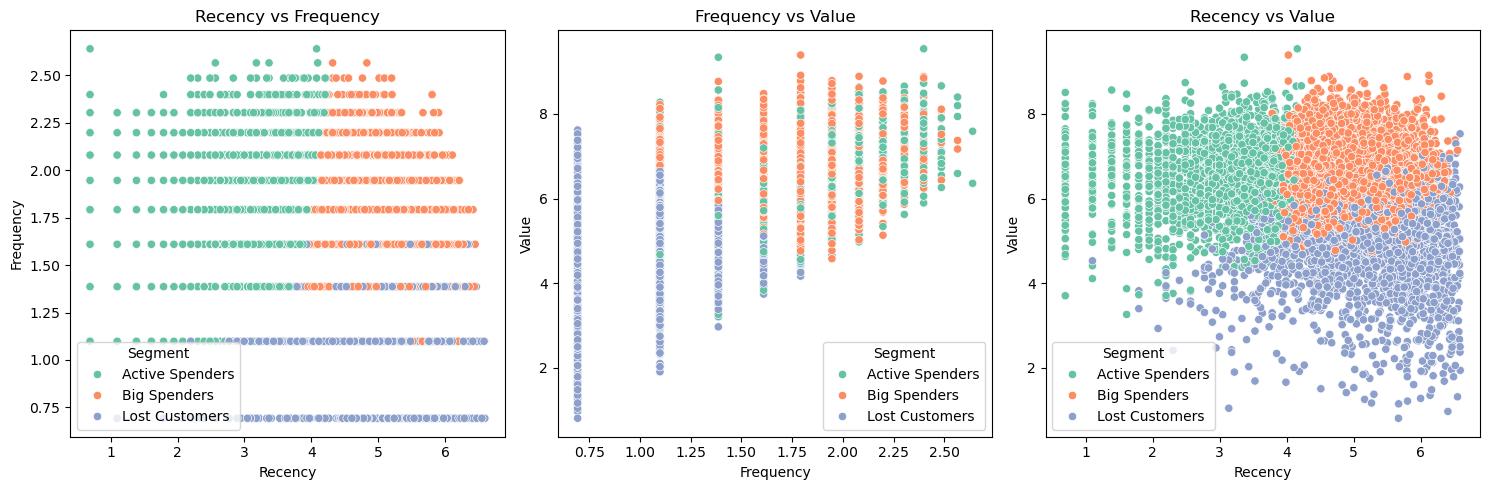

In [16]:
plt.figure(figsize=(15,5))

# Recency vs Frequency
plt.subplot(1,3,1)
sns.scatterplot(x="Recency", y="Frequency", hue="Segment", data=rmf_log, palette="Set2")
plt.title("Recency vs Frequency")

# Frequency vs Value
plt.subplot(1,3,2)
sns.scatterplot(x="Frequency", y="Value", hue="Segment", data=rmf_log, palette="Set2")
plt.title("Frequency vs Value")

# Recency vs Value
plt.subplot(1,3,3)
sns.scatterplot(x="Recency", y="Value", hue="Segment", data=rmf_log, palette="Set2")
plt.title("Recency vs Value")

plt.tight_layout()
plt.show()

## Customer Segmentation Results  

Using **K = 3**, the customer base was segmented into three distinct groups. The scatter plots below illustrate the clusters across different RFM dimensions.  

### Identified Segments  
- **Active Spenders (Green)**  
  Customers who shop frequently and have relatively recent purchase activity. They may not always have the highest spending per transaction but are highly engaged and valuable for consistent revenue.  

- **Big Spenders (Orange)**  
  Customers who generate high monetary value, often with larger purchases. They may not be as frequent as the active spenders but contribute significantly to overall revenue. These customers represent a premium segment.  

- **Lost Customers (Blue)**  
  Customers with high recency values, meaning they have not made purchases in a long time. Their frequency and value are also relatively low, indicating they are at risk of churn or have already lapsed.  

### Business Implications  
- **Active Spenders** should be nurtured with loyalty programs, rewards, or exclusive promotions to maintain their high engagement.  
- **Big Spenders** could be targeted with personalized offers, premium services, or VIP treatment to maximize retention and lifetime value.  
- **Lost Customers** may require re-engagement campaigns such as discounts, win-back emails, or reminders to encourage them to return.  

This segmentation provides actionable insights, enabling tailored strategies for customer retention, loyalty building, and revenue growth.  


---

## Merging Segmentation Results with Main Dataset  

After defining the customer segments, the next step is to **merge the segmentation labels back into the main dataset**. This integration allows us to enrich the original data with additional insights from the RFM analysis and K-Means clustering.  

By combining both datasets, we can:  
- Link each customer to their corresponding segment label (Active Spenders, Big Spenders, Lost Customers).  
- Perform deeper analysis, such as revenue contribution by segment, purchasing trends, and retention opportunities.  
- Enable targeted strategies and personalized decision-making based on customer behavior patterns.  

This merged dataset serves as a comprehensive foundation for further business analysis and strategic planning.  


In [ ]:
    rmf_log = rmf_log.reset_index()

# Samakan tipe data
sales_data["customer_id"] = sales_data["customer_id"].astype(str)
rmf_log["customer_id"] = rmf_log["customer_id"].astype(str)

# Merge hasil cluster langsung ke data utama
sales_data = sales_data.merge(
    rmf_log[["customer_id", "Cluster"]],
    on="customer_id",
    how="left"
)
segment_map = {
    0: "Active Spenders",   # Recency Low, freq & value Mid
    1: "Lost Customers",    # Recency High, freq & value Low
    2: "Big Spenders"       # Recency High, value High
}

sales_data["Segment"] = sales_data["Cluster"].map(segment_map)

sales_data.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,...,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,order by Month,order by Days,Cluster,Segment
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,...,No,139.47,7.88,31.17,60,Female,12,Saturday,2,Big Spenders
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,...,No,24.73,4.60,-2.62,37,Male,4,Thursday,0,Active Spenders
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,...,No,166.80,6.58,13.44,34,Male,10,Tuesday,0,Active Spenders
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,...,No,63.67,5.50,2.14,21,Female,9,Saturday,0,Active Spenders
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,...,No,13.88,2.74,1.15,39,Male,12,Saturday,2,Big Spenders


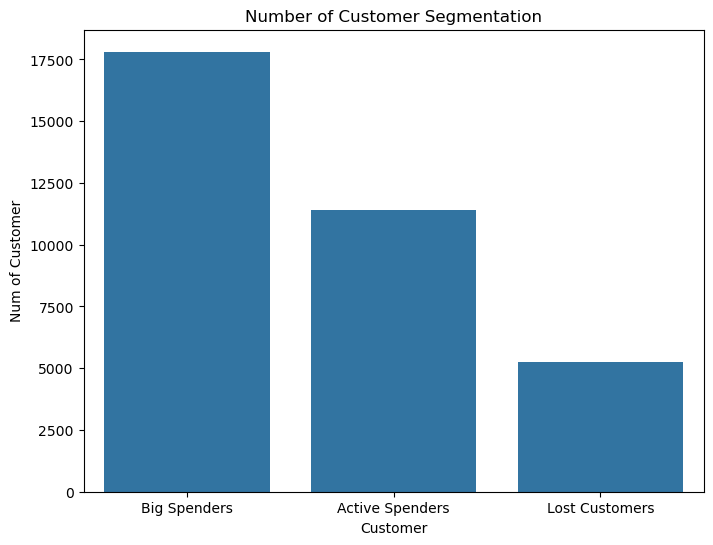

In [20]:
 
plt.figure(figsize=(8,6))
sns.countplot(x="Segment", data=sales_data)
plt.title("Number of Customer Segmentation")
plt.xlabel("Customer")
plt.ylabel("Num of Customer")
plt.show()

### Customer Segmentation Analysis  

The bar chart above shows the **distribution of customers across different segments**:  

- **Big Spenders** dominate the customer base with around **18,000 customers**, representing the largest segment.  
- **Active Spenders** follow with about **11,500 customers**, indicating a strong group of engaged but moderate buyers.  
- **Lost Customers** account for the smallest segment, with just over **5,000 customers**, highlighting a group that may require reactivation strategies.  

📌 **Insight:**  
The company’s revenue potential heavily relies on **Big Spenders**. While **Active Spenders** provide steady growth, **Lost Customers** may present an opportunity for targeted re-engagement campaigns.  
